In [1]:
import pandas as pd

# Load the datasets
train_df = pd.read_csv('C:/Users/rfrjo/Downloads/CDS/mp_20/train.csv')
test_df = pd.read_csv('C:/Users/rfrjo/Downloads/CDS/mp_20/test.csv')
val_df = pd.read_csv('C:/Users/rfrjo/Downloads/CDS/mp_20/val.csv')


In [2]:
import re

def extract_cif(cif_string):
    # Remove the initial description line
    cif_string = cif_string.split("\n", 1)[1]
    # Split the CIF string into lines
    lines = cif_string.split("\n")
    # Extract key-value pairs
    cif_data = {}
    key = None
    values = []
    for line in lines:
        if line.startswith("_"):
            if key is not None:
                cif_data[key] = values
            key = line.split()[0]
            values = line.split()[1:]
        elif line.startswith("loop_") or line.startswith("#"):
            continue
        else:
            values.extend(line.split())
    if key is not None:
        cif_data[key] = values
    return cif_data

# Apply the function to extract CIF data
train_df['cif_data'] = train_df['cif'].apply(extract_cif)
test_df['cif_data'] = test_df['cif'].apply(extract_cif)
val_df['cif_data'] = val_df['cif'].apply(extract_cif)


In [3]:
# Calculate basic statistics for formation_energy_per_atom
formation_energy_stats = train_df['formation_energy_per_atom'].describe()
print(formation_energy_stats)

# Calculate statistics for band_gap
band_gap_stats = train_df['band_gap'].describe()
print(band_gap_stats)


count    27136.000000
mean        -1.219803
std          1.029393
min         -5.153569
25%         -2.013250
50%         -0.814771
75%         -0.400797
max          0.079825
Name: formation_energy_per_atom, dtype: float64
count    27136.000000
mean         0.791848
std          1.417775
min          0.000000
25%          0.000000
50%          0.000000
75%          1.142100
max         17.902300
Name: band_gap, dtype: float64


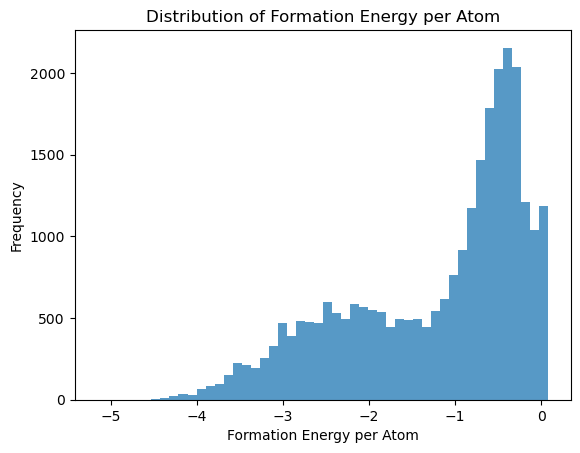

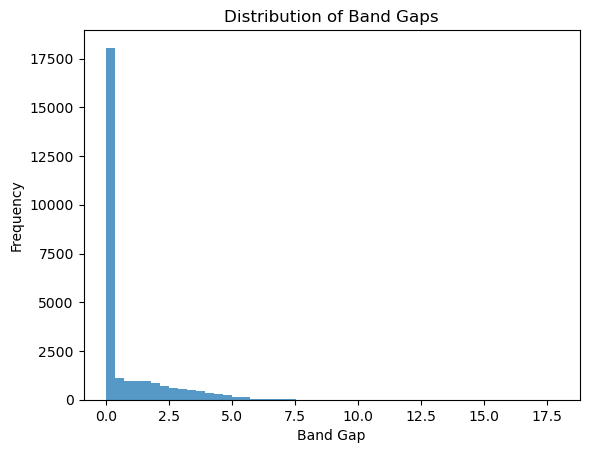

In [4]:
import matplotlib.pyplot as plt

# Plot the distribution of formation energy per atom
plt.hist(train_df['formation_energy_per_atom'], bins=50, alpha=0.75)
plt.title('Distribution of Formation Energy per Atom')
plt.xlabel('Formation Energy per Atom')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of band gaps
plt.hist(train_df['band_gap'], bins=50, alpha=0.75)
plt.title('Distribution of Band Gaps')
plt.xlabel('Band Gap')
plt.ylabel('Frequency')
plt.show()


In [2]:
import pandas as pd
# Concatenate all datasets to find unique molecules
all_data = pd.concat([train_df, test_df, val_df])

# Extract unique molecule identifiers
unique_molecules = all_data['material_id'].unique()

# Count the number of unique molecules
num_unique_molecules = len(unique_molecules)

print(f"Number of unique molecules across all datasets: {num_unique_molecules}")

Number of unique molecules across all datasets: 45229


In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample excerpt from the provided data
data = all_data

# Create DataFrame
df = pd.DataFrame(data)

# Function to count the number of atoms in a sites_frac entry
def count_atoms(sites_frac):
    return len(sites_frac.split('\n'))

# Apply the function to the sites_frac column to get the number of atoms
df['number_of_atoms'] = df['sites_frac'].apply(count_atoms)

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['number_of_atoms'], bins=5, edgecolor='black')
plt.title('Distribution of the Number of Atoms')
plt.xlabel('Number of Atoms')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


KeyError: 'sites_frac'

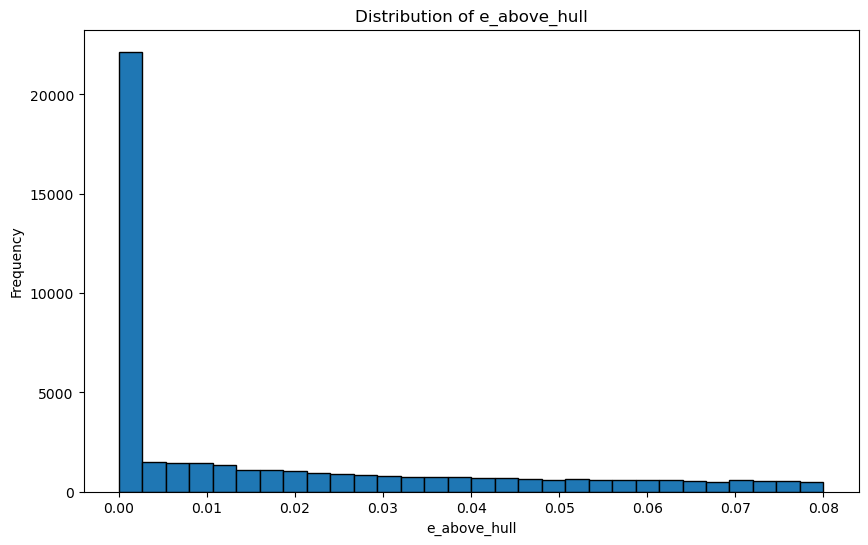

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame

# Check if the necessary column exists
if 'e_above_hull' not in all_data.columns:
    raise ValueError("The column 'e_above_hull' is not present in the CSV file.")

# Remove rows with missing or non-numeric values in 'e_above_hull'
all_data = all_data[pd.to_numeric(all_data['e_above_hull'], errors='coerce').notnull()]

# Convert 'e_above_hull' to numeric type
all_data['e_above_hull'] = pd.to_numeric(all_data['e_above_hull'])

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(all_data['e_above_hull'], bins=30, edgecolor='black')

# Adding titles and labels
plt.title('Distribution of e_above_hull')
plt.xlabel('e_above_hull')
plt.ylabel('Frequency')

# Display the plot
plt.show()


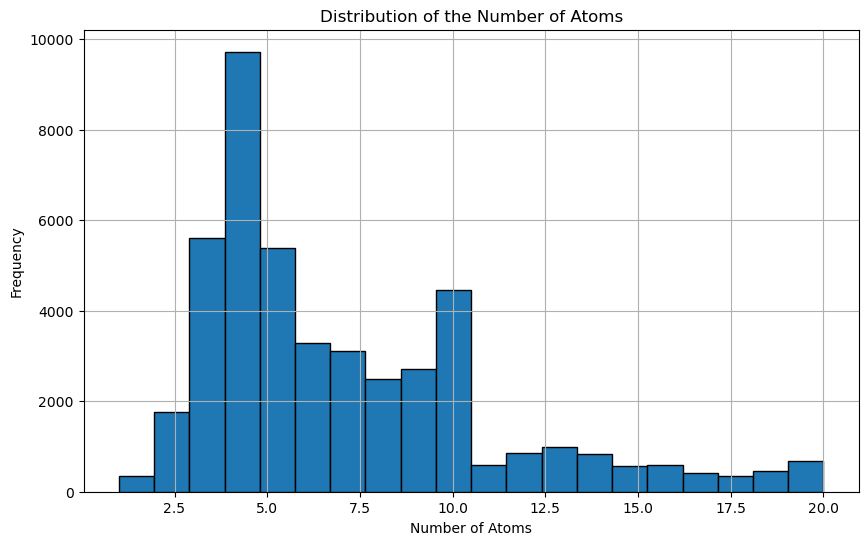

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from pymatgen.core import Composition

# Function to count the number of atoms in a chemical formula
def count_atoms(formula):
    composition = Composition(formula)
    return composition.num_atoms
    

# Read the CSV file into a DataFrame (replace 'all_data.csv' with your actual file path)

# Apply the count_atoms function to the pretty_formula column
all_data['number_of_atoms'] = all_data['pretty_formula'].apply(count_atoms)

# Drop rows with invalid formulas (where number_of_atoms is None)
all_data = all_data.dropna(subset=['number_of_atoms'])

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(all_data['number_of_atoms'], bins=20, edgecolor='black')
plt.title('Distribution of the Number of Atoms')
plt.xlabel('Number of Atoms')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [1]:
import json
import os
import csv
from tqdm import tqdm
from pymatgen.core.structure import Structure
from pymatgen.io.cif import CifWriter

# Define the base paths
json_base_path = 'C:/Users/rfrjo/Downloads/CDS/Alexandria'
csv_base_path = 'C:/Users/rfrjo/Downloads/CDS/cdvae/data/mp_20'

# Loop through the file numbers
for i in range(45):  # From 0 to 44 inclusive
    json_file_name = f'alexandria_{i:03d}.json/alexandria_{i:03d}.json'
    json_file_path = os.path.join(json_base_path, json_file_name)
    csv_file_name = f'Alexandriaexcerpt{i}.csv'
    csv_file_path = os.path.join(csv_base_path, csv_file_name)

    # Check if the JSON file exists
    if not os.path.exists(json_file_path):
        print(f"The file at {json_file_path} does not exist. Skipping...")
        continue

    # Read the JSON file content
    with open(json_file_path, 'r', encoding='utf-8') as file:
        file_content = file.read()

    # Load the JSON data
    try:
        data = json.loads(file_content)
        print(f"JSON data from {json_file_name} loaded successfully.")
    except json.JSONDecodeError as e:
        print(f"Error decoding JSON from {json_file_name}: {e}")
        continue

    # Open CSV file for writing
    with open(csv_file_path, 'w', newline='', encoding='utf-8') as csv_file:
        csv_writer = csv.writer(csv_file)
        # Write CSV header
        csv_writer.writerow(['material_id', 'cif', 'formation_energy_per_atom'])

        # Process each entry with a progress bar
        for entry in tqdm(data["entries"], desc=f"Processing entries in {json_file_name}"):
            energy_above_hull = entry["data"].get("e_above_hull", None)
            if energy_above_hull is not None and energy_above_hull <= 0.1:
                structure_data = entry["structure"]
                structure = Structure.from_dict(structure_data)
                
                # Check if the number of sites (atoms) is 20 or less
                if structure.num_sites > 20:
                    continue

                mat_id = entry["data"]["mat_id"]
                formation_energy_per_atom = entry["data"].get("e_form", None)

                # Convert structure to CIF string
                cif_writer = CifWriter(structure)
                cif_string = cif_writer.__str__()

                # Write to CSV
                csv_writer.writerow([mat_id, cif_string, formation_energy_per_atom])

    print(f"Data successfully written to {csv_file_path}")


JSON data from alexandria_000.json/alexandria_000.json loaded successfully.


Processing entries in alexandria_000.json/alexandria_000.json: 100%|██████████| 100000/100000 [00:53<00:00, 1885.14it/s]


Data successfully written to C:/Users/rfrjo/Downloads/CDS/cdvae/data/mp_20\Alexandriaexcerpt0.csv
JSON data from alexandria_001.json/alexandria_001.json loaded successfully.


Processing entries in alexandria_001.json/alexandria_001.json: 100%|██████████| 100000/100000 [00:27<00:00, 3602.87it/s]


Data successfully written to C:/Users/rfrjo/Downloads/CDS/cdvae/data/mp_20\Alexandriaexcerpt1.csv
JSON data from alexandria_002.json/alexandria_002.json loaded successfully.


Processing entries in alexandria_002.json/alexandria_002.json:  23%|██▎       | 22906/100000 [00:08<00:45, 1691.72it/s]c:\Users\rfrjo\anaconda3\Lib\site-packages\pymatgen\core\periodic_table.py:142: UserWarning: No Pauling electronegativity for Ar. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.
  warnings.warn(
Processing entries in alexandria_002.json/alexandria_002.json: 100%|██████████| 100000/100000 [01:17<00:00, 1291.12it/s]


Data successfully written to C:/Users/rfrjo/Downloads/CDS/cdvae/data/mp_20\Alexandriaexcerpt2.csv
JSON data from alexandria_003.json/alexandria_003.json loaded successfully.


Processing entries in alexandria_003.json/alexandria_003.json: 100%|██████████| 100000/100000 [00:58<00:00, 1723.53it/s]


Data successfully written to C:/Users/rfrjo/Downloads/CDS/cdvae/data/mp_20\Alexandriaexcerpt3.csv
JSON data from alexandria_004.json/alexandria_004.json loaded successfully.


Processing entries in alexandria_004.json/alexandria_004.json: 100%|██████████| 100000/100000 [00:17<00:00, 5811.53it/s]


Data successfully written to C:/Users/rfrjo/Downloads/CDS/cdvae/data/mp_20\Alexandriaexcerpt4.csv
JSON data from alexandria_005.json/alexandria_005.json loaded successfully.


Processing entries in alexandria_005.json/alexandria_005.json: 100%|██████████| 100000/100000 [00:52<00:00, 1907.16it/s]


Data successfully written to C:/Users/rfrjo/Downloads/CDS/cdvae/data/mp_20\Alexandriaexcerpt5.csv
JSON data from alexandria_006.json/alexandria_006.json loaded successfully.


Processing entries in alexandria_006.json/alexandria_006.json: 100%|██████████| 100000/100000 [00:31<00:00, 3214.01it/s]


Data successfully written to C:/Users/rfrjo/Downloads/CDS/cdvae/data/mp_20\Alexandriaexcerpt6.csv
JSON data from alexandria_007.json/alexandria_007.json loaded successfully.


Processing entries in alexandria_007.json/alexandria_007.json: 100%|██████████| 100000/100000 [00:44<00:00, 2238.61it/s]


Data successfully written to C:/Users/rfrjo/Downloads/CDS/cdvae/data/mp_20\Alexandriaexcerpt7.csv
JSON data from alexandria_008.json/alexandria_008.json loaded successfully.


Processing entries in alexandria_008.json/alexandria_008.json: 100%|██████████| 100000/100000 [00:18<00:00, 5512.48it/s]


Data successfully written to C:/Users/rfrjo/Downloads/CDS/cdvae/data/mp_20\Alexandriaexcerpt8.csv
JSON data from alexandria_009.json/alexandria_009.json loaded successfully.


Processing entries in alexandria_009.json/alexandria_009.json: 100%|██████████| 100000/100000 [00:54<00:00, 1823.61it/s]


Data successfully written to C:/Users/rfrjo/Downloads/CDS/cdvae/data/mp_20\Alexandriaexcerpt9.csv
JSON data from alexandria_010.json/alexandria_010.json loaded successfully.


Processing entries in alexandria_010.json/alexandria_010.json: 100%|██████████| 100000/100000 [00:38<00:00, 2620.00it/s]


Data successfully written to C:/Users/rfrjo/Downloads/CDS/cdvae/data/mp_20\Alexandriaexcerpt10.csv
JSON data from alexandria_011.json/alexandria_011.json loaded successfully.


Processing entries in alexandria_011.json/alexandria_011.json: 100%|██████████| 100000/100000 [00:59<00:00, 1687.46it/s]


Data successfully written to C:/Users/rfrjo/Downloads/CDS/cdvae/data/mp_20\Alexandriaexcerpt11.csv
JSON data from alexandria_012.json/alexandria_012.json loaded successfully.


Processing entries in alexandria_012.json/alexandria_012.json: 100%|██████████| 100000/100000 [00:22<00:00, 4507.08it/s]


Data successfully written to C:/Users/rfrjo/Downloads/CDS/cdvae/data/mp_20\Alexandriaexcerpt12.csv
JSON data from alexandria_013.json/alexandria_013.json loaded successfully.


Processing entries in alexandria_013.json/alexandria_013.json:  29%|██▉       | 29250/100000 [00:07<00:33, 2130.90it/s]c:\Users\rfrjo\anaconda3\Lib\site-packages\pymatgen\core\periodic_table.py:142: UserWarning: No Pauling electronegativity for He. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.
  warnings.warn(
Processing entries in alexandria_013.json/alexandria_013.json: 100%|██████████| 100000/100000 [00:23<00:00, 4298.95it/s]


Data successfully written to C:/Users/rfrjo/Downloads/CDS/cdvae/data/mp_20\Alexandriaexcerpt13.csv
JSON data from alexandria_014.json/alexandria_014.json loaded successfully.


Processing entries in alexandria_014.json/alexandria_014.json: 100%|██████████| 100000/100000 [00:41<00:00, 2433.04it/s]


Data successfully written to C:/Users/rfrjo/Downloads/CDS/cdvae/data/mp_20\Alexandriaexcerpt14.csv
JSON data from alexandria_015.json/alexandria_015.json loaded successfully.


Processing entries in alexandria_015.json/alexandria_015.json: 100%|██████████| 100000/100000 [00:30<00:00, 3231.66it/s]


Data successfully written to C:/Users/rfrjo/Downloads/CDS/cdvae/data/mp_20\Alexandriaexcerpt15.csv
JSON data from alexandria_016.json/alexandria_016.json loaded successfully.


Processing entries in alexandria_016.json/alexandria_016.json: 100%|██████████| 100000/100000 [00:40<00:00, 2486.90it/s]


Data successfully written to C:/Users/rfrjo/Downloads/CDS/cdvae/data/mp_20\Alexandriaexcerpt16.csv
JSON data from alexandria_017.json/alexandria_017.json loaded successfully.


Processing entries in alexandria_017.json/alexandria_017.json: 100%|██████████| 100000/100000 [00:38<00:00, 2583.91it/s]


Data successfully written to C:/Users/rfrjo/Downloads/CDS/cdvae/data/mp_20\Alexandriaexcerpt17.csv
JSON data from alexandria_018.json/alexandria_018.json loaded successfully.


Processing entries in alexandria_018.json/alexandria_018.json: 100%|██████████| 100000/100000 [00:45<00:00, 2186.47it/s]


Data successfully written to C:/Users/rfrjo/Downloads/CDS/cdvae/data/mp_20\Alexandriaexcerpt18.csv
JSON data from alexandria_019.json/alexandria_019.json loaded successfully.


Processing entries in alexandria_019.json/alexandria_019.json: 100%|██████████| 100000/100000 [00:37<00:00, 2696.76it/s]


Data successfully written to C:/Users/rfrjo/Downloads/CDS/cdvae/data/mp_20\Alexandriaexcerpt19.csv
JSON data from alexandria_020.json/alexandria_020.json loaded successfully.


Processing entries in alexandria_020.json/alexandria_020.json: 100%|██████████| 100000/100000 [00:46<00:00, 2143.77it/s]


Data successfully written to C:/Users/rfrjo/Downloads/CDS/cdvae/data/mp_20\Alexandriaexcerpt20.csv
JSON data from alexandria_021.json/alexandria_021.json loaded successfully.


Processing entries in alexandria_021.json/alexandria_021.json: 100%|██████████| 100000/100000 [00:35<00:00, 2842.85it/s]


Data successfully written to C:/Users/rfrjo/Downloads/CDS/cdvae/data/mp_20\Alexandriaexcerpt21.csv
JSON data from alexandria_022.json/alexandria_022.json loaded successfully.


Processing entries in alexandria_022.json/alexandria_022.json: 100%|██████████| 100000/100000 [00:27<00:00, 3658.51it/s]


Data successfully written to C:/Users/rfrjo/Downloads/CDS/cdvae/data/mp_20\Alexandriaexcerpt22.csv
JSON data from alexandria_023.json/alexandria_023.json loaded successfully.


Processing entries in alexandria_023.json/alexandria_023.json: 100%|██████████| 100000/100000 [00:17<00:00, 5759.25it/s]


Data successfully written to C:/Users/rfrjo/Downloads/CDS/cdvae/data/mp_20\Alexandriaexcerpt23.csv
JSON data from alexandria_024.json/alexandria_024.json loaded successfully.


Processing entries in alexandria_024.json/alexandria_024.json: 100%|██████████| 100000/100000 [00:54<00:00, 1842.83it/s]


Data successfully written to C:/Users/rfrjo/Downloads/CDS/cdvae/data/mp_20\Alexandriaexcerpt24.csv
JSON data from alexandria_025.json/alexandria_025.json loaded successfully.


Processing entries in alexandria_025.json/alexandria_025.json: 100%|██████████| 100000/100000 [00:30<00:00, 3267.27it/s]


Data successfully written to C:/Users/rfrjo/Downloads/CDS/cdvae/data/mp_20\Alexandriaexcerpt25.csv
JSON data from alexandria_026.json/alexandria_026.json loaded successfully.


Processing entries in alexandria_026.json/alexandria_026.json:  73%|███████▎  | 73492/100000 [00:43<00:20, 1292.25it/s]c:\Users\rfrjo\anaconda3\Lib\site-packages\pymatgen\core\periodic_table.py:142: UserWarning: No Pauling electronegativity for Ne. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.
  warnings.warn(
Processing entries in alexandria_026.json/alexandria_026.json: 100%|██████████| 100000/100000 [00:48<00:00, 2071.59it/s]


Data successfully written to C:/Users/rfrjo/Downloads/CDS/cdvae/data/mp_20\Alexandriaexcerpt26.csv
JSON data from alexandria_027.json/alexandria_027.json loaded successfully.


Processing entries in alexandria_027.json/alexandria_027.json: 100%|██████████| 100000/100000 [00:35<00:00, 2817.14it/s]


Data successfully written to C:/Users/rfrjo/Downloads/CDS/cdvae/data/mp_20\Alexandriaexcerpt27.csv
JSON data from alexandria_028.json/alexandria_028.json loaded successfully.


Processing entries in alexandria_028.json/alexandria_028.json: 100%|██████████| 100000/100000 [00:56<00:00, 1778.36it/s]


Data successfully written to C:/Users/rfrjo/Downloads/CDS/cdvae/data/mp_20\Alexandriaexcerpt28.csv
JSON data from alexandria_029.json/alexandria_029.json loaded successfully.


Processing entries in alexandria_029.json/alexandria_029.json: 100%|██████████| 100000/100000 [00:59<00:00, 1676.25it/s]


Data successfully written to C:/Users/rfrjo/Downloads/CDS/cdvae/data/mp_20\Alexandriaexcerpt29.csv
JSON data from alexandria_030.json/alexandria_030.json loaded successfully.


Processing entries in alexandria_030.json/alexandria_030.json: 100%|██████████| 100000/100000 [00:46<00:00, 2167.89it/s]


Data successfully written to C:/Users/rfrjo/Downloads/CDS/cdvae/data/mp_20\Alexandriaexcerpt30.csv
JSON data from alexandria_031.json/alexandria_031.json loaded successfully.


Processing entries in alexandria_031.json/alexandria_031.json: 100%|██████████| 100000/100000 [00:43<00:00, 2308.29it/s]


Data successfully written to C:/Users/rfrjo/Downloads/CDS/cdvae/data/mp_20\Alexandriaexcerpt31.csv
JSON data from alexandria_032.json/alexandria_032.json loaded successfully.


Processing entries in alexandria_032.json/alexandria_032.json: 100%|██████████| 100000/100000 [00:18<00:00, 5471.85it/s]


Data successfully written to C:/Users/rfrjo/Downloads/CDS/cdvae/data/mp_20\Alexandriaexcerpt32.csv
JSON data from alexandria_033.json/alexandria_033.json loaded successfully.


Processing entries in alexandria_033.json/alexandria_033.json: 100%|██████████| 100000/100000 [00:20<00:00, 4955.84it/s]


Data successfully written to C:/Users/rfrjo/Downloads/CDS/cdvae/data/mp_20\Alexandriaexcerpt33.csv
JSON data from alexandria_034.json/alexandria_034.json loaded successfully.


Processing entries in alexandria_034.json/alexandria_034.json: 100%|██████████| 100000/100000 [00:51<00:00, 1955.19it/s]


Data successfully written to C:/Users/rfrjo/Downloads/CDS/cdvae/data/mp_20\Alexandriaexcerpt34.csv
JSON data from alexandria_035.json/alexandria_035.json loaded successfully.


Processing entries in alexandria_035.json/alexandria_035.json: 100%|██████████| 100000/100000 [00:36<00:00, 2715.57it/s]


Data successfully written to C:/Users/rfrjo/Downloads/CDS/cdvae/data/mp_20\Alexandriaexcerpt35.csv
JSON data from alexandria_036.json/alexandria_036.json loaded successfully.


Processing entries in alexandria_036.json/alexandria_036.json: 100%|██████████| 100000/100000 [00:16<00:00, 5966.40it/s]


Data successfully written to C:/Users/rfrjo/Downloads/CDS/cdvae/data/mp_20\Alexandriaexcerpt36.csv
JSON data from alexandria_037.json/alexandria_037.json loaded successfully.


Processing entries in alexandria_037.json/alexandria_037.json: 100%|██████████| 100000/100000 [01:40<00:00, 998.21it/s]


Data successfully written to C:/Users/rfrjo/Downloads/CDS/cdvae/data/mp_20\Alexandriaexcerpt37.csv
JSON data from alexandria_038.json/alexandria_038.json loaded successfully.


Processing entries in alexandria_038.json/alexandria_038.json: 100%|██████████| 100000/100000 [00:32<00:00, 3062.87it/s]


Data successfully written to C:/Users/rfrjo/Downloads/CDS/cdvae/data/mp_20\Alexandriaexcerpt38.csv
JSON data from alexandria_039.json/alexandria_039.json loaded successfully.


Processing entries in alexandria_039.json/alexandria_039.json: 100%|██████████| 100000/100000 [00:36<00:00, 2713.84it/s]


Data successfully written to C:/Users/rfrjo/Downloads/CDS/cdvae/data/mp_20\Alexandriaexcerpt39.csv
JSON data from alexandria_040.json/alexandria_040.json loaded successfully.


Processing entries in alexandria_040.json/alexandria_040.json: 100%|██████████| 100000/100000 [00:38<00:00, 2596.57it/s]


Data successfully written to C:/Users/rfrjo/Downloads/CDS/cdvae/data/mp_20\Alexandriaexcerpt40.csv
JSON data from alexandria_041.json/alexandria_041.json loaded successfully.


Processing entries in alexandria_041.json/alexandria_041.json: 100%|██████████| 100000/100000 [00:37<00:00, 2688.26it/s]


Data successfully written to C:/Users/rfrjo/Downloads/CDS/cdvae/data/mp_20\Alexandriaexcerpt41.csv
JSON data from alexandria_042.json/alexandria_042.json loaded successfully.


Processing entries in alexandria_042.json/alexandria_042.json: 100%|██████████| 100000/100000 [00:35<00:00, 2826.18it/s]


Data successfully written to C:/Users/rfrjo/Downloads/CDS/cdvae/data/mp_20\Alexandriaexcerpt42.csv
JSON data from alexandria_043.json/alexandria_043.json loaded successfully.


Processing entries in alexandria_043.json/alexandria_043.json: 100%|██████████| 100000/100000 [00:18<00:00, 5309.11it/s]


Data successfully written to C:/Users/rfrjo/Downloads/CDS/cdvae/data/mp_20\Alexandriaexcerpt43.csv
JSON data from alexandria_044.json/alexandria_044.json loaded successfully.


Processing entries in alexandria_044.json/alexandria_044.json: 100%|██████████| 89295/89295 [00:16<00:00, 5429.87it/s] 

Data successfully written to C:/Users/rfrjo/Downloads/CDS/cdvae/data/mp_20\Alexandriaexcerpt44.csv


In [6]:
import pandas as pd
import re

def extract_elements_from_formula(formula):
    # This regex matches element symbols in chemical formulas
    element_pattern = re.compile(r'([A-Z][a-z]?)')
    return set(element_pattern.findall(formula))

def extract_formula_from_cif(cif_string):
    # Find the line with 'data_' followed by the chemical formula
    match = re.search(r'data_([A-Za-z0-9]+)', cif_string)
    if match:
        return match.group(1)
    return None

unique_atoms = set()

# Process mp_20_data
mp_20_data = all_data
for cif_string in mp_20_data['cif']:
    formula = extract_formula_from_cif(cif_string)
    if formula:
        elements = extract_elements_from_formula(formula)
        unique_atoms.update(elements)

# Process 45 CSV files
for i in range(45):
    csv_file_path = f'C:/Users/rfrjo/Downloads/CDS/AlexandriaCSV/Alexandriaexcerpt{i}.csv'
    data = pd.read_csv(csv_file_path)
    
    # Extract atom types from each CIF string
    for cif_string in data['cif']:
        formula = extract_formula_from_cif(cif_string)
        if formula:
            elements = extract_elements_from_formula(formula)
            unique_atoms.update(elements)

# Print the unique atom types and their count
print(f"Unique atom types: {unique_atoms}")
print(f"Number of unique atom types: {len(unique_atoms)}")


Unique atom types: {'Er', 'La', 'Zr', 'Cs', 'Re', 'P', 'B', 'Sr', 'Pd', 'S', 'Tb', 'Mo', 'Y', 'Cr', 'Zn', 'Mg', 'Mn', 'He', 'Ir', 'Se', 'Np', 'Pu', 'N', 'Tc', 'I', 'V', 'Pt', 'K', 'Pb', 'O', 'Ca', 'Dy', 'Xe', 'In', 'Th', 'Ga', 'H', 'Ta', 'Br', 'Gd', 'Ac', 'Yb', 'F', 'Co', 'Cl', 'Os', 'Kr', 'Ne', 'Ar', 'Ba', 'Ti', 'Be', 'Cu', 'Na', 'Tm', 'Cd', 'Pr', 'Lu', 'Ru', 'Sm', 'Ni', 'U', 'Ce', 'W', 'Si', 'Sb', 'Hf', 'Au', 'Hg', 'Te', 'Li', 'Bi', 'Fe', 'Sn', 'Ag', 'Nb', 'Tl', 'Rh', 'Ge', 'Ho', 'Al', 'Pa', 'Eu', 'Pm', 'As', 'Sc', 'Nd', 'C', 'Rb'}
Number of unique atom types: 89


In [ ]:
f"Prev: Number of unique materials: 1455022"
f"After: Number of unique materials: 1376997"

In [ ]:
import torch
import torch.nn as nn

# Example parameters
num_heads = 8
d_model = 3  # embedding dimension, must be divisible by num_heads
num_atoms = 100  # example value for num_atoms

# Step 1: Create a matrix of shape (363, 3)
input_matrix = torch.randn(363, d_model)

# Step 2: Multihead attention setup
multihead_attn = nn.MultiheadAttention(embed_dim=d_model, num_heads=num_heads, batch_first=True)

# Step 3: Prepare the input for multihead attention (needs to be of shape (N, S, E) if batch_first=True)
# Here, N is the batch size, S is the sequence length, and E is the embedding dimension.
# Since we don't have a batch, we can add a batch dimension of size 1.
input_matrix = input_matrix.unsqueeze(0)  # Shape: (1, 363, 3)

# Dummy key and value for attention, typically they can be different, but here we'll use input_matrix for simplicity
key_matrix = input_matrix
value_matrix = input_matrix

# Apply multihead attention
output, _ = multihead_attn(input_matrix, key_matrix, value_matrix)

# Step 4: Remove the batch dimension and transpose the result
output = output.squeeze(0).transpose(0, 1)  # Shape: (3, 363)

# Step 5: Create another matrix of shape (363, num_atoms)
another_matrix = torch.randn(363, num_atoms)

# Step 6: Perform matrix multiplication to get the final output of shape (3, num_atoms)
final_output = torch.matmul(output, another_matrix)

print(final_output.shape)  # Should print: torch.Size([3, num_atoms])


In [15]:
# insider.shape = (num_atoms, latent_dim=512)

import torch
import torch.nn.functional as F
insider = torch.randn(363, 512)

# Example tensor representing the number of atoms in each molecule in the batch
num_atoms = torch.tensor([20, 4, 16, 8, 5, 4, 10, 12, 6, 20, 3, 10, 18, 12, 6, 5, 5, 6,
                          6, 6, 12, 20, 6, 4, 9, 20, 12, 14, 13, 5, 11, 6, 4, 4, 8, 12,
                          6, 12, 18, 12, 4, 10, 10, 14, 20, 9, 5, 4, 8, 10, 20, 16, 10, 6,
                          6, 14])

# Example output tensor from a neural network
latent_dim = 512
output_tensor = torch.randn(num_atoms.sum(), latent_dim)  # Shape: (num_atoms.sum(), latent_dim)

# Split the output tensor into individual molecule tensors
molecule_tensors = torch.split(output_tensor, num_atoms.tolist())

# Pad the tensors to ensure they all have the same shape (max_num_atoms, latent_dim)
max_num_atoms = 20
padded_tensors = []
masks = []

for mol_tensor in molecule_tensors:
    num_atoms_in_molecule = mol_tensor.shape[0]
    
    # Pad the tensor
    padding = (0, 0, 0, max_num_atoms - num_atoms_in_molecule)  # Pad only the second dimension
    padded_tensor = F.pad(mol_tensor, padding, "constant", 0)
    padded_tensors.append(padded_tensor)
    
    # Create the mask
    mask = torch.zeros(max_num_atoms, dtype=float)
    mask[:num_atoms_in_molecule] = 1
    masks.append(mask)

# Stack the padded tensors and masks to form the final batch tensors
padded_batch_tensor = torch.stack(padded_tensors)  # Shape: (batch_size, max_num_atoms, latent_dim)
mask_tensor = torch.stack(masks)  # Shape: (batch_size, max_num_atoms)

print("Padded batch tensor shape:", padded_batch_tensor.shape)  # Should be (batch_size, max_num_atoms, latent_dim)
print("Mask tensor shape:", mask_tensor.shape)  # Should be (batch_size, max_num_atoms)

random_weights = torch.randn(512*20, 3)
view_insider = padded_batch_tensor.view(-1, 512*20)
final_len = view_insider @ random_weights
print(final_len.shape)

Padded batch tensor shape: torch.Size([56, 20, 512])
Mask tensor shape: torch.Size([56, 20])
torch.Size([56, 3])


In [3]:
import pytorch_lightning as pl
import torch
print(torch.__version__)

1.9.0+cpu
